In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lang_main import io
from lang_main.analysis.graphs import rescale_edge_weights, get_graph_metadata

from pathlib import Path
import pickle
import base64
import os
from logging import NullHandler

import numpy as np
import networkx as nx

import py4cytoscape as p4c
#import py4cytoscape.py4cytoscape_logger_settings as p4c_logging
#p4c.set_summary_logger(False)
#p4c_logging._SUMMARY_LOG_LEVEL = 'ERROR'
# p4c_logging._DETAIL_LOG_LEVEL = 'ERROR'
#p4c.py4cytoscape_logger.detail_logger.setLevel('ERROR')
#p4c.py4cytoscape_logger.detail_logger.removeHandler(p4c.py4cytoscape_logger.detail_handler)
#p4c.py4cytoscape_logger.detail_logger.addHandler(NullHandler())

2024-07-24 06:14:08 +0000 | io:INFO | Loaded TOML config file successfully.


A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytre

In [3]:
res_path = Path(r'A:\Arbeitsaufgaben\lang-main\scripts\results\test_20240619')
assert res_path.exists()

In [4]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [5]:
ret = io.load_pickle(load_pth)

2024-07-24 06:14:16 +0000 | io:INFO | Loaded file successfully.


In [6]:
tkg = ret[0]

In [7]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 158, number of edges: 192)

In [8]:
tkg.rescaled_weights

False

In [9]:
tkg.nodes['Wartungstätigkeit']

{'degree_weighted': 186350}

In [10]:
tkg.undirected.nodes['Wartungstätigkeit']

{'degree_weighted': 186350}

In [11]:
obj = 'TK-GRAPH_POSTPROCESSING.pkl'
# obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [12]:
ret = io.load_pickle(load_pth)

2024-07-19 05:56:10 +0000 | io:INFO | Loaded file successfully.


In [13]:
tkg = ret[0]

In [14]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 6859, number of edges: 25499)

In [15]:
tkg.rescaled_weights

False

In [16]:
directed, undirected = tkg.rescale_edge_weights()

In [17]:
directed.metadata_directed

{'num_nodes': 6859,
 'num_edges': 25499,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 433996,
 'edge_memory': 1427944,
 'total_memory': 1861940}

In [18]:
directed.metadata_undirected

{'num_nodes': 6859,
 'num_edges': 24796,
 'min_edge_weight': 1,
 'max_edge_weight': 92690,
 'node_memory': 433996,
 'edge_memory': 1388576,
 'total_memory': 1822572}

In [19]:
get_graph_metadata(undirected)

{'num_nodes': 6859,
 'num_edges': 24796,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 433996,
 'edge_memory': 1388576,
 'total_memory': 1822572}

break_early = False
i = 0
for idx, (node1, node2) in enumerate(list(Gtest.edges)):
    if break_early and i == 10:
        break
    Gtest[node1][node2]['weight'] = adjusted_weights[idx]
    
    i += 1

In [20]:
break_early = True
i = 0
for n1, n2, w in directed.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit Maschinenbediener 0.8215
Wartungstätigkeit Laserabteilung 0.8215
Wartungstätigkeit Arbeitsplan 0.8219
Wartungstätigkeit abarbeiten 0.8215
Wartungstätigkeit Webmaschinenkontrollliste 0.2534
Wartungstätigkeit sehen 0.2534
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9181


In [21]:
break_early = True
i = 0
for n1, n2, w in undirected.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit sehen 0.2534
Wartungstätigkeit Maschinenbediener 0.8215
Wartungstätigkeit Laserabteilung 0.8215
Wartungstätigkeit Arbeitsplan 0.8219
Wartungstätigkeit abarbeiten 0.8215
Wartungstätigkeit Webmaschinenkontrollliste 0.2534
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9181


---

# Load re-scaled Token Graph

In [6]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS_RESCALED.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [7]:
ret = io.load_pickle(load_pth)

2024-07-24 06:14:31 +0000 | io:INFO | Loaded file successfully.


In [8]:
tk_resc = ret[1]

In [9]:
get_graph_metadata(tk_resc)

{'num_nodes': 158,
 'num_edges': 189,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 9908,
 'edge_memory': 10584,
 'total_memory': 20492}

In [97]:
break_early = True
n = 10

for idx, (node, weighted_degree) in enumerate(tk_resc.degree(weight='weight')):
    if break_early and idx == n:
        break
    print(node, weighted_degree)

Wartungstätigkeit 3.1190000474452972
Vorgabe 4.145399987697601
Maschinenhersteller 2.0
Sichtkontrolle 0.8227999806404114
Reinigung 1.7093999981880188
Überprüfung 2.0071999728679657
Ölabscheider 0.7318999767303467
Kontrolle 6.2471999898552895
C-Anlage 0.6929000020027161
Stabbreithalter 0.5758000016212463


In [312]:
dict(tk_resc.degree(weight='weight'))

{'Wartungstätigkeit': 3.1190000474452972,
 'Vorgabe': 4.145399987697601,
 'Maschinenhersteller': 2.0,
 'Sichtkontrolle': 0.8227999806404114,
 'Reinigung': 1.7093999981880188,
 'Überprüfung': 2.0071999728679657,
 'Ölabscheider': 0.7318999767303467,
 'Kontrolle': 6.2471999898552895,
 'C-Anlage': 0.6929000020027161,
 'Stabbreithalter': 0.5758000016212463,
 'Scharniere': 0.7002999782562256,
 '--': 0.7002999782562256,
 'Schließvorrichtung': 0.7059999704360962,
 'Schloß': 0.7059999704360962,
 'Kompressorstation': 0.5514000058174133,
 'Wasseraufbereitungsanlage': 0.5105999708175659,
 'Heizungsanlage': 0.5101000070571899,
 'Druckkontrolle': 1.140199989080429,
 'bar': 1.2935999631881714,
 'machen': 1.4854000210762024,
 'gegebenenfalls': 0.4934000074863434,
 'Filter': 0.4934000074863434,
 'sauber': 0.4986000061035156,
 'Leiter': 0.6482000052928925,
 'Analyse': 0.42980000376701355,
 'Kesselwasser': 0.42980000376701355,
 'überprüfen': 0.42980000376701355,
 'Wasserverbrauch': 0.42980000376701355,
 

In [98]:
nx.set_node_attributes(tk_resc, dict(tk_resc.degree(weight='weight')), name='weight_degree')

In [102]:
break_early = True
n = 10

for idx, node in enumerate(tk_resc.nodes):
    if break_early and idx == n:
        break
    print(tk_resc.nodes[node])

{'weight_degree': 3.1190000474452972}
{'weight_degree': 4.145399987697601}
{'weight_degree': 2.0}
{'weight_degree': 0.8227999806404114}
{'weight_degree': 1.7093999981880188}
{'weight_degree': 2.0071999728679657}
{'weight_degree': 0.7318999767303467}
{'weight_degree': 6.2471999898552895}
{'weight_degree': 0.6929000020027161}
{'weight_degree': 0.5758000016212463}


In [103]:
#import py4cytoscape as p4c
p4c.cytoscape_ping()

You are connected to Cytoscape!


'You are connected to Cytoscape!'

In [164]:
p4c.get_collection_list()

['lang_main']

In [25]:
p4c.networks.delete_all_networks()

''

In [182]:
p4c.networks.delete_network('test3')

''

In [208]:
p4c.networks.delete_all_networks()

''

In [209]:

p4c.create_network_from_networkx(tk_resc, title=BASE_NAME, collection='lang_main')

Applying default style...
Applying preferred layout


20743

In [210]:
p4c.tools.analyze_network(directed=False)

{'networkTitle': 'test (undirected)',
 'nodeCount': '158',
 'edgeCount': '189',
 'avNeighbors': '2.3684210526315788',
 'diameter': '10',
 'radius': '5',
 'avSpl': '3.7965860597439547',
 'cc': '0.3375',
 'density': '0.06401137980085347',
 'heterogeneity': '1.0891156226526975',
 'centralization': '0.38888888888888895',
 'ncc': '27',
 'time': '0.003'}

---

In [10]:
BASE_NETWORK_NAME = 'test'

def import_to_cytoscape(graph):
    p4c.networks.delete_all_networks()
    p4c.create_network_from_networkx(graph, title=BASE_NETWORK_NAME, collection='lang_main')
    p4c.tools.analyze_network(directed=False)


def reset_current_network_to_base():
    p4c.set_current_network(BASE_NETWORK_NAME)


def export_network_to_image(filename, filetype='SVG', network_name=BASE_NETWORK_NAME):
    target_folder = Path.cwd() / 'results'
    if not target_folder.exists():
        target_folder.mkdir(parents=True)
    file_pth = target_folder / filename

    text_as_font = True
    if filetype == 'SVG':
        text_as_font = False

    p4c.export_image(filename=str(file_pth), type=filetype, network=network_name, overwrite_file=True, all_graphics_details=True, export_text_as_font=text_as_font, page_size='A4')

In [11]:
LAYOUT_NAME = 'force-directed'
LAYOUT_PROPERTIES = {
    'numIterations': 1000,
    'defaultSpringCoefficient': 1e-4,
    'defaultSpringLength': 45,
    'defaultNodeMass': 11,
    'isDeterministic': True,
    'singlePartition': False,
}
PATH_STYLESHEET = Path('lang_main.xml')
STYLESHEET_NAME = 'lang_main'

def layout_network(layout_name=LAYOUT_NAME, layout_properties=LAYOUT_PROPERTIES, network_name=BASE_NETWORK_NAME):
    p4c.set_layout_properties(layout_name, layout_properties)
    p4c.layout_network(layout_name=layout_name, network=network_name)
    p4c.fit_content(selected_only=False, network=network_name)


def apply_style_to_network(pth_to_stylesheet=PATH_STYLESHEET, network_name=BASE_NETWORK_NAME):
    styles_avail = p4c.get_visual_style_names()
    if STYLESHEET_NAME not in styles_avail:
        p4c.import_visual_styles(pth_to_stylesheet)

    p4c.set_visual_style(STYLESHEET_NAME, network=network_name)
    p4c.fit_content(selected_only=False, network=network_name)

In [12]:
SELECTION_PROPERTY = 'node_selection'
SELECTION_NUMBER = 5
ITER_NEIGHBOUR_DEPTH = 2

def get_sub_node_selection(network_name=BASE_NETWORK_NAME):
    node_table = p4c.get_table_columns(network=network_name)
    node_table['stress_norm'] = node_table['Stress'] / node_table['Stress'].max()
    node_table[SELECTION_PROPERTY] = node_table['weight_degree'] * node_table['BetweennessCentrality'] * node_table['stress_norm']
    node_table = node_table.sort_values(by=SELECTION_PROPERTY, ascending=False)
    node_table_choice = node_table.iloc[:SELECTION_NUMBER,:]

    return node_table_choice['SUID'].to_list()


def select_neighbours_of_node(node, network_name=BASE_NETWORK_NAME):
    p4c.clear_selection(network=network_name)
    p4c.select_nodes(node, network=network_name)

    for _ in range(ITER_NEIGHBOUR_DEPTH):
        _ = p4c.select_first_neighbors(network=network_name)

    _ = p4c.select_edges_connecting_selected_nodes()


def make_subnetwork(index, network_name=BASE_NETWORK_NAME, export_image=True):
    subnetwork_name = network_name + f'_sub_{index+1}'
    p4c.create_subnetwork(nodes='selected', edges='selected', subnetwork_name=subnetwork_name, network=network_name)
    p4c.set_current_network(subnetwork_name)
    p4c.fit_content(selected_only=False, network=network_name)
    if export_image:
        export_network_to_image(filename=subnetwork_name, network_name=subnetwork_name)


def build_subnetworks(nodes_to_analyse, network_name=BASE_NETWORK_NAME, export_image=True):
    for idx, node in enumerate(nodes_to_analyse):
        select_neighbours_of_node(node=node, network_name=network_name)
        make_subnetwork(index=idx, network_name=network_name, export_image=export_image)

In [21]:
data = p4c.get_table_columns()

In [22]:
data['test2'] = data['degree_weighted'] * 1000

In [23]:
data

SUID       shared name              name  selected  \
257   257       anschreiben       anschreiben     False   
259   259  Erledigungsdatum  Erledigungsdatum     False   
261   261             Monat             Monat     False   
263   263       durchführen       durchführen     False   
265   265             Motor             Motor     False   
..    ...               ...               ...       ...   
247   247              Sitz              Sitz     False   
249   249  Wäscherkontrolle  Wäscherkontrolle     False   
251   251    Betriebsstunde    Betriebsstunde     False   
253   253           V-Röhre           V-Röhre     False   
255   255          Wechseln          Wechseln     False   

     AverageShortestPathLength  BetweennessCentrality  ClosenessCentrality  \
257                   1.750000               0.000000             0.571429   
259                   1.750000               0.000000             0.571429   
261                   4.945946               0.054054             0.202186   
263                   5.918919               0.000000             0.168950   
265                   1.000000               0.833333             1.000000   
..                         ...                    ...                  ...   
247                   3.000000               0.000000             0.333333   
249                   3.459459               0.000000             0.289062   
251                   1.500000               0.000000             0.666667   
253                   1.500000               0.000000             0.666667   
255                   1.000000               1.000000             1.000000   

     ClusteringCoefficient  Degree  Eccentricity  ...  \
257               0.000000       1             2  ...   
259               0.000000       1             2  ...   
261               0.000000       2             9  ...   
263               0.000000       1            10  ...   
265               0.166667       4             1  ...   
..                     ...     ...           ...  ...   
247               0.000000       1             5  ...   
249               1.000000       2             7  ...   
251               0.000000       1             2  ...   
253               0.000000       1             2  ...   
255               0.000000       2             1  ...   

     PartnerOfMultiEdgedNodePairs  Radiality  SelfLoops  Stress  \
257                             0   0.812500          0       0   
259                             0   0.812500          0       0   
261                             0   0.753378          0      72   
263                             0   0.692568          0       0   
265                             0   1.000000          0      10   
..                            ...        ...        ...     ...   
247                             0   0.666667          0       0   
249                             0   0.846284          0       0   
251                             0   0.750000          0       0   
253                             0   0.750000          0       0   
255                             0   1.000000          0       2   

     TopologicalCoefficient                id  degree_weighted  row.names  \
257                0.000000       anschreiben           0.2457        257   
259                0.000000  Erledigungsdatum           0.2457        259   
261                0.500000             Monat           0.4219        261   
263                0.000000       durchführen           0.2457        263   
265                0.500000             Motor           0.9828        265   
..                      ...               ...              ...        ...   
247                0.000000              Sitz           0.1580        247   
249                0.666667  Wäscherkontrolle           0.4914        249   
251                0.000000    Betriebsstunde           0.2524        251   
253                0.000000           V-Röhre           0.2524        253   
255                0.0

---

1. import network
2. layouting
3. apply styles
4. export image
5. build subgraphs
    1. get candidates
    2. build subnetwork
    3. export subnetwork

In [305]:
import_to_cytoscape(tk_resc)

Applying default style...
Applying preferred layout


In [306]:
layout_network()

In [307]:
apply_style_to_network()

In [308]:
export_network_to_image(filename=BASE_NETWORK_NAME)

In [309]:
nodes_to_analyse = get_sub_node_selection()

In [310]:
build_subnetworks(nodes_to_analyse=nodes_to_analyse, export_image=True)

No nodes selected.
No nodes selected.
No nodes selected.
No nodes selected.


In [40]:
data = p4c.get_table_columns()
data

SUID         shared name                name  selected  \
16385  16385         Fremdkörper         Fremdkörper     False   
16130  16130        Aschenbecher        Aschenbecher     False   
16388  16388            anfragen            anfragen     False   
16133  16133              leeren              leeren     False   
16391  16391              Termin              Termin     False   
...      ...                 ...                 ...       ...   
16121  16121     Wasserverbrauch     Wasserverbrauch     False   
16379  16379      Sicherstellung      Sicherstellung     False   
16124  16124           auffüllen           auffüllen     False   
16382  16382      Ausblasöffnung      Ausblasöffnung     False   
16127  16127  Desifektionsmittel  Desifektionsmittel     False   

                       id  degree_weighted  AverageShortestPathLength  \
16385         Fremdkörper           0.1257                   1.000000   
16130        Aschenbecher           0.7114                   1.333333   
16388            anfragen           0.4557                   1.000000   
16133              leeren           0.3557                   2.000000   
16391              Termin           0.4557                   1.000000   
...                   ...              ...                        ...   
16121     Wasserverbrauch           0.4298                   1.000000   
16379      Sicherstellung           0.1257                   1.000000   
16124           auffüllen           0.7114                   1.333333   
16382      Ausblasöffnung           0.1257                   1.000000   
16127  Desifektionsmittel           0.3557                   2.000000   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  Stress  \
16385                    0.0                 1.00         False  ...       0   
16130                    0.0                 0.75         False  ...       4   
16388                    0.0                 1.00         False  ...       0   
16133                    0.0                 0.50         False  ...       0   
16391                    0.0                 1.00         False  ...       0   
...                      ...                  ...           ...  ...     ...   
16121                    0.0                 1.00         False  ...       0   
16379                    0.0                 1.00         False  ...       0   
16124                    0.0                 0.75         False  ...       4   
16382                    0.0                 1.00         False  ...       0   
16127                    0.0                 0.50         False  ...       0   

       Degree  BetweennessCentrality  NeighborhoodConnectivity  \
16385       1               0.000000                       1.0   
16130       2               0.666667                       1.5   
16388       1               0.000000                       1.0   
16133       1               0.000000                       2.0   
16391       1               0.000000                       1.0   
...       ...                    ...                       ...   
16121       1               0.000000                       1.0   
16379       1               0.000000                       1.0   
16124       2               0.666667                       1.5   
16382       1               0.000000                       1.0   
16127       1               0.000000                       2.0   

       NumberOfDirectedEdges  NumberOfUndirectedEdges  Radiality  \
16385                      0                        1   1.000000   
16130                      0                        2   0.833333   
16388                      0                        1   1.000000   
16133                      0                        1   0.500000   
16391                      0                        1   1.000000   
...                      ...                      ...        ...   
16121                      0                        1   1.000000   
16379                      0            

In [41]:
min_val = data['node_selection'].min()
max_val = data['node_selection'].max()
print(f'{min_val=}, {max_val=}')

min_val=0.0, max_val=3.008924891341149


In [54]:
scheme = p4c.scheme_c_number_continuous(start_value=15, end_value=40)

In [55]:
node_size_map = p4c.gen_node_size_map('node_selection', number_scheme=scheme, mapping_type='c', style_name='lang_main', default_number=18)

In [56]:
node_size_map

{'table_column': 'node_selection',
 'table_column_values': [0.0, 1.5044624456705744, 3.008924891341149],
 'sizes': [15, 27.5, 40],
 'mapping_type': 'c',
 'default_size': 18,
 'style_name': 'lang_main',
 'network': None,
 'base_url': 'http://127.0.0.1:1234/v1'}

In [57]:
p4c.set_node_size_mapping(**node_size_map)

''

In [9]:
test = dict()

In [11]:
if not test:
    print('jo')

jo


In [12]:
from lang_main.render.cytoscape import layout_network

In [13]:
layout_network()

In [296]:
IDX = 0
nodes_to_select[IDX]

41497

In [297]:
select_neighbours_of_node(nodes_to_select[IDX])

In [300]:
build_subnetwork(IDX)

In [190]:
node_table = p4c.get_table_columns(network=BASE_NAME)

In [191]:
type(node_table)

pandas.core.frame.DataFrame

In [192]:
node_table.sort_values(by='Degree', ascending=False)

SUID           shared name                  name  selected  \
18610  18610             Kontrolle             Kontrolle     False   
18778  18778                  Herr                  Herr     False   
18799  18799                 Firma                 Firma     False   
18694  18694                 sehen                 sehen     False   
18712  18712             schmieren             schmieren     False   
...      ...                   ...                   ...       ...   
19048  19048                   E50                   E50     False   
19045  19045                    Öl                    Öl     False   
19042  19042  Rollenkette-zweifach  Rollenkette-zweifach     False   
19039  19039      Wechselintervall      Wechselintervall     False   
18943  18943                Menzel                Menzel     False   

                         id  weight_degree  AverageShortestPathLength  \
18610             Kontrolle         6.2472                   2.270270   
18778                  Herr         5.4802                   3.114286   
18799                 Firma         3.6372                   3.571429   
18694                 sehen         3.6508                   3.114286   
18712             schmieren         1.4378                   2.621622   
...                     ...            ...                        ...   
19048                   E50         0.1762                   4.243243   
19045                    Öl         0.1762                   1.000000   
19042  Rollenkette-zweifach         0.1762                   1.000000   
19039      Wechselintervall         0.1762                   1.000000   
18943                Menzel         0.5950                   4.542857   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  \
18610               0.025000             0.440476         False  ...   
18778               0.294872             0.321101         False  ...   
18799               0.127273             0.280000         False  ...   
18694               0.333333             0.321101         False  ...   
18712               0.066667             0.381443         False  ...   
...                      ...                  ...           ...  ...   
19048               0.000000             0.235669         False  ...   
19045               0.000000             1.000000         False  ...   
19042               0.000000             1.000000         False  ...   
19039               0.000000             1.000000         False  ...   
18943               0.000000             0.220126         False  ...   

       SelfLoops  Eccentricity  Stress  Degree  BetweennessCentrality  \
18610          0             5    1062      16               0.797297   
18778          1             6     962      15               0.402857   
18799          0             7    1328      11               0.401681   
18694          0             6    1034       7               0.281793   
18712          0             6     626       6               0.469970   
...          ...           ...     ...     ...                    ...   
19048          0             8       0       1               0.000000   
19045          0             1       0       1               0.000000   
19042          0             1       0       1               0.000000   
19039          0             1       0       1               0.000000   
18943          0             8       0       1               0.000000   

       NeighborhoodConnectivity  NumberOfDirectedEdges  \
18610                  1.812500                      0   
18778                  4.692308                      0   
18799                  2.818182                      0   
18694                  4.571429                      0   
18712                  4.333333                      0   
...                         ...                    ...   
19048                  4.000000                      0   
19045                  1.000000                      0   
19042                  1.0

---

In [193]:
node_table['stress_norm'] = node_table['Stress'] / node_table['Stress'].max()

In [194]:
node_table['w_deg with betweenness'] = node_table['weight_degree'] * node_table['BetweennessCentrality'] * node_table['stress_norm']

In [195]:
node_table_sorted = node_table.sort_values(by='w_deg with betweenness', ascending=False)

In [196]:
node_table_sorted.head()

SUID        shared name               name  selected  \
18610  18610          Kontrolle          Kontrolle     False   
18585  18585  Wartungstätigkeit  Wartungstätigkeit     False   
18778  18778               Herr               Herr     False   
18799  18799              Firma              Firma     False   
18592  18592            Vorgabe            Vorgabe     False   

                      id  weight_degree  AverageShortestPathLength  \
18610          Kontrolle         6.2472                   2.270270   
18585  Wartungstätigkeit         3.1190                   2.714286   
18778               Herr         5.4802                   3.114286   
18799              Firma         3.6372                   3.571429   
18592            Vorgabe         4.1454                   2.885714   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  Stress  \
18610               0.025000             0.440476         False  ...    1062   
18585               0.133333             0.368421         False  ...    1758   
18778               0.294872             0.321101         False  ...     962   
18799               0.127273             0.280000         False  ...    1328   
18592               0.400000             0.346535         False  ...    1106   

       Degree  BetweennessCentrality  NeighborhoodConnectivity  \
18610      16               0.797297                  1.812500   
18585       6               0.571429                  3.000000   
18778      15               0.402857                  4.692308   
18799      11               0.401681                  2.818182   
18592       5               0.315406                  4.600000   

       NumberOfDirectedEdges  NumberOfUndirectedEdges  Radiality  \
18610                      0                       16   0.920608   
18585                      0                        6   0.868132   
18778                      0                       14   0.837363   
18799                      0                       11   0.802198   
18592                      0                        5   0.854945   

       TopologicalCoefficient  stress_norm  w_deg with betweenness  
18610                0.091346     0.604096                3.008925  
18585                0.242424     1.000000                1.782286  
18778                0.329670     0.547213                1.208102  
18799                0.223140     0.755404                1.103640  
18592                0.383333     0.629124                0.822570  

[5 rows x 23 columns]

In [197]:
node_table_choice = node_table_sorted.iloc[:5,:]

In [198]:
node_table_choice

SUID        shared name               name  selected  \
18610  18610          Kontrolle          Kontrolle     False   
18585  18585  Wartungstätigkeit  Wartungstätigkeit     False   
18778  18778               Herr               Herr     False   
18799  18799              Firma              Firma     False   
18592  18592            Vorgabe            Vorgabe     False   

                      id  weight_degree  AverageShortestPathLength  \
18610          Kontrolle         6.2472                   2.270270   
18585  Wartungstätigkeit         3.1190                   2.714286   
18778               Herr         5.4802                   3.114286   
18799              Firma         3.6372                   3.571429   
18592            Vorgabe         4.1454                   2.885714   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  Stress  \
18610               0.025000             0.440476         False  ...    1062   
18585               0.133333             0.368421         False  ...    1758   
18778               0.294872             0.321101         False  ...     962   
18799               0.127273             0.280000         False  ...    1328   
18592               0.400000             0.346535         False  ...    1106   

       Degree  BetweennessCentrality  NeighborhoodConnectivity  \
18610      16               0.797297                  1.812500   
18585       6               0.571429                  3.000000   
18778      15               0.402857                  4.692308   
18799      11               0.401681                  2.818182   
18592       5               0.315406                  4.600000   

       NumberOfDirectedEdges  NumberOfUndirectedEdges  Radiality  \
18610                      0                       16   0.920608   
18585                      0                        6   0.868132   
18778                      0                       14   0.837363   
18799                      0                       11   0.802198   
18592                      0                        5   0.854945   

       TopologicalCoefficient  stress_norm  w_deg with betweenness  
18610                0.091346     0.604096                3.008925  
18585                0.242424     1.000000                1.782286  
18778                0.329670     0.547213                1.208102  
18799                0.223140     0.755404                1.103640  
18592                0.383333     0.629124                0.822570  

[5 rows x 23 columns]

In [199]:
nodes_to_select = node_table_choice['SUID'].to_list()

In [200]:
p4c.clear_selection()

''

In [239]:
p4c.select_nodes(nodes_to_select[0])

{}

In [202]:
iter_depth = 2

for _ in range(iter_depth):
    _ = p4c.select_first_neighbors()

In [203]:
_ = p4c.select_edges_connecting_selected_nodes()

In [206]:
p4c.create_subnetwork(nodes='selected', edges='selected', subnetwork_name='test_sub_1')

20402

In [205]:
p4c.fit_content(selected_only=False)

{}

In [314]:
sorted(list(p4c.get_layout_name_mapping().values()))

['attribute-circle',
 'attribute-grid',
 'attributes-layout',
 'circular',
 'cose',
 'degree-circle',
 'force-directed',
 'force-directed-cl',
 'fruchterman-rheingold',
 'grid',
 'hierarchical',
 'isom',
 'kamada-kawai',
 'stacked-node-layout']

In [186]:
p4c.get_layout_property_names('force-directed')

['numIterations',
 'defaultSpringCoefficient',
 'defaultSpringLength',
 'defaultNodeMass',
 'isDeterministic',
 'singlePartition']

In [259]:
LAYOUT_NAME = 'force-directed'
LAYOUT_PROPERTIES = {
    'numIterations': 1000,
    'defaultSpringCoefficient': 1e-4,
    'defaultSpringLength': 45,
    'defaultNodeMass': 11,
    'isDeterministic': True,
    'singlePartition': False,
}

In [188]:
p4c.set_layout_properties('force-directed', layout_props)
#p4c.get_layout_property_type('kamada-kawai', 'randomize')

''

In [189]:
p4c.layout_network(layout_name='force-directed', network='test3')

{}

In [ ]:
p4c.fit_content(selected_only=False)

In [34]:
# visual style gets always imported with increasing index,
# later check if style in Cytoscape is already available
styles_avail = p4c.get_visual_style_names()

In [35]:
if 'lang_main' not in styles_avail:
    p4c.import_visual_styles('lang_main.xml')

In [36]:
assert 'lang_main' in p4c.get_visual_style_names()

In [37]:
p4c.set_visual_style('lang_main')

{'message': 'Visual Style applied.'}

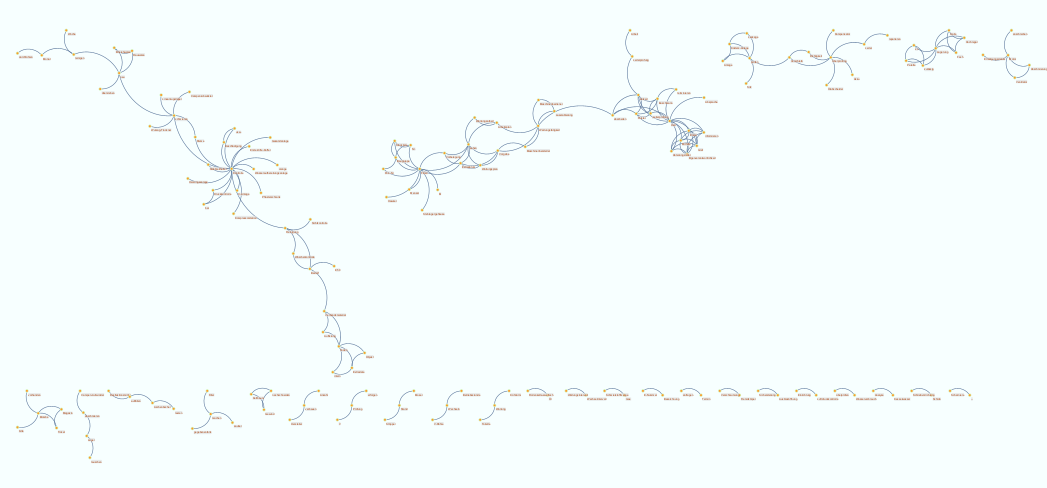

In [79]:
p4c.notebook_export_show_image()

- graph properties in Cytoscape or pre-calculated?
- node sizes depending on graph properties
- edge width depending on graph properties

---

# Py4Cytoscape

In [11]:
import py4cytoscape as p4c
dir(p4c)
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | Calling cytoscape_ping()
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀCalling cytoscape_version_info(base_url='http://127.0.0.1:1234/v1')
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀCalling cyrest_get('version', base_url='http://127.0.0.1:1234/v1')
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀHTTP GET(http://127.0.0.1:1234/v1/version)
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀOK[200], content: {"apiVersion":"v1","cytoscapeVersion":"3.10.2"}
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀReturning 'cyrest_get': {'apiVersion': 'v1', 'cytoscapeVersion': '3.10.2'}
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀReturning 'cytoscape_version_info': {'apiVersion': 'v1', 'cytoscapeVersion': '3.10.2', 'automationAPIVersion': '1.9.0', 'py4cytoscapeVersion': '1.9.0'}
You are connected to Cytoscape!
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | Returning 'cyt

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [5]:
import pandas as pd
nodes = pd.DataFrame(data={'id': ["node 0","node 1","node 2","node 3"], 'group': ["A","A","B","B"], 'score': [20,10,15,5]})
edges = pd.DataFrame(data={'source': ["node 0","node 0","node 0","node 2"], 'target': ["node 1","node 2","node 3","node 3"], 'interaction': ["inhibits","interacts","activates","interacts"], 'weight': [5.1,3.0,5.2,9.9]})

In [6]:
nodes

id group  score
0  node 0     A     20
1  node 1     A     10
2  node 2     B     15
3  node 3     B      5

In [7]:
edges

source  target interaction  weight
0  node 0  node 1    inhibits     5.1
1  node 0  node 2   interacts     3.0
2  node 0  node 3   activates     5.2
3  node 2  node 3   interacts     9.9

In [8]:
p4c.create_network_from_data_frames(nodes, edges, title="my first network", collection="DataFrame Example")

Applying default style...
Applying preferred layout


128

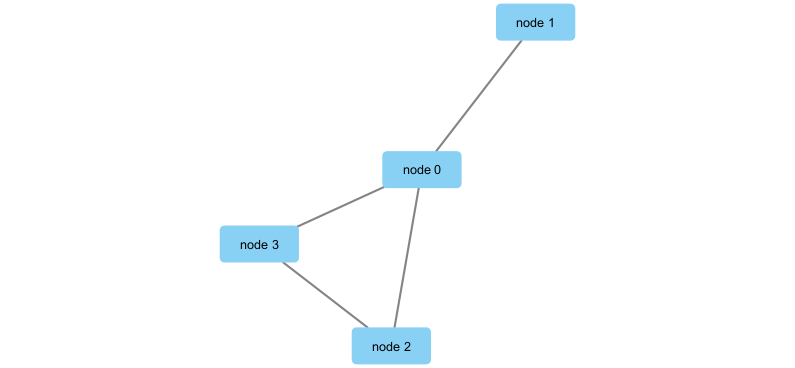

In [10]:
p4c.notebook_export_show_image()

In [11]:
p4c.set_visual_style('Marquee')

{'message': 'Visual Style applied.'}

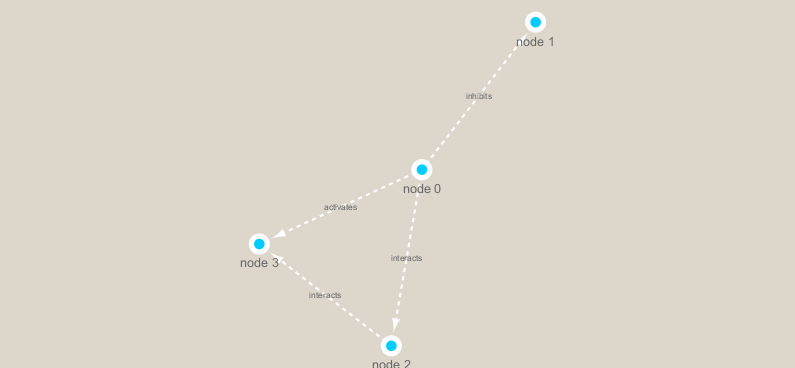

In [13]:
p4c.notebook_export_show_image()

In [14]:
style_name = "myStyle"
defaults = {'NODE_SHAPE': "diamond", 'NODE_SIZE': 30, 'EDGE_TRANSPARENCY': 120, 'NODE_LABEL_POSITION': "W,E,c,0.00,0.00"}
nodeLabels = p4c.map_visual_property('node label', 'id', 'p') #'p' means 'passthrough' mapping
edgeWidth = p4c.map_visual_property('edge width', 'weight', 'p') #'p' means 'passthrough' mapping
p4c.create_visual_style(style_name, defaults, [nodeLabels, edgeWidth])
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

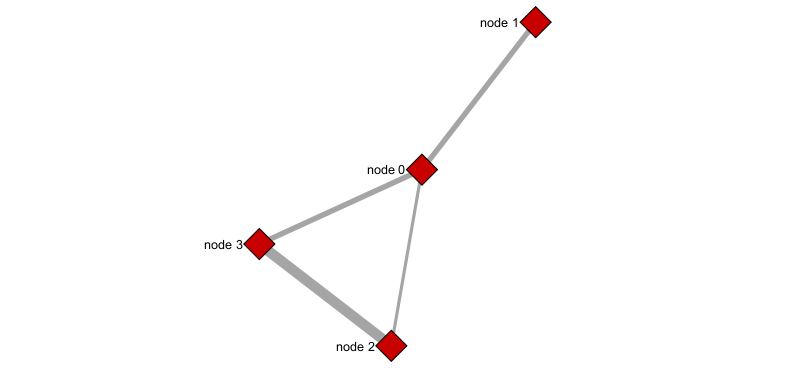

In [15]:
p4c.notebook_export_show_image()

In [20]:
nodes = pd.DataFrame(data={'id': ["A", "B", "C", "D"]})
edges = pd.DataFrame(data={'source': ["C", "B", "B", "B"], 'target': ["D", "A", "D", "C"]})

p4c.create_network_from_data_frames(nodes, edges, title="simple network", collection="Biological Example")

Applying default style...
Applying preferred layout


397

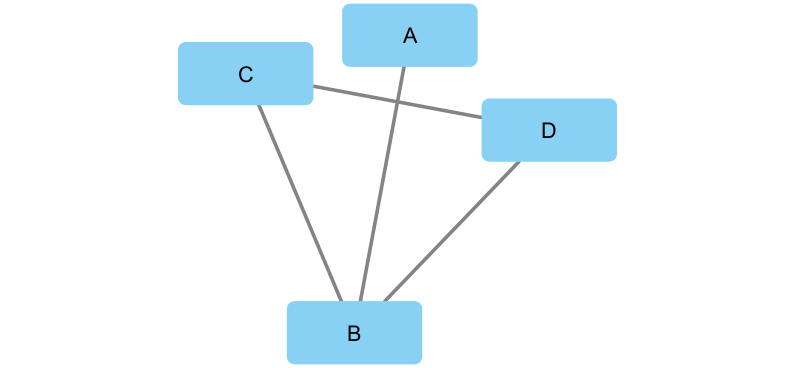

In [21]:
p4c.notebook_export_show_image()

In [22]:
p4c.get_table_columns()

SUID shared name id name  selected
427   427           A  A    A     False
430   430           B  B    B     False
433   433           C  C    C     False
436   436           D  D    D     False

In [23]:
p4c.get_table_column_names()

['SUID', 'shared name', 'id', 'name', 'selected']

In [25]:
p4c.get_layout_name_mapping()

{'Attribute Circle Layout': 'attribute-circle',
 'Stacked Node Layout': 'stacked-node-layout',
 'Attribute Grid Layout': 'attribute-grid',
 'Degree Sorted Circle Layout': 'degree-circle',
 'Circular Layout': 'circular',
 'Group Attributes Layout': 'attributes-layout',
 'Edge-weighted Spring Embedded Layout': 'kamada-kawai',
 'Prefuse Force Directed Layout': 'force-directed',
 'Compound Spring Embedder (CoSE)': 'cose',
 'Grid Layout': 'grid',
 'Hierarchical Layout': 'hierarchical',
 'Edge-weighted Force directed (BioLayout)': 'fruchterman-rheingold',
 'Inverted Self-Organizing Map Layout': 'isom',
 'Prefuse Force Directed OpenCL Layout': 'force-directed-cl'}

In [29]:
p4c.get_layout_property_names('kamada-kawai')

['m_averageIterationsPerNode',
 'm_nodeDistanceStrengthConstant',
 'm_nodeDistanceRestLengthConstant',
 'm_disconnectedNodeDistanceSpringStrength',
 'm_disconnectedNodeDistanceSpringRestLength',
 'm_anticollisionSpringStrength',
 'm_layoutPass',
 'singlePartition',
 'unweighted',
 'randomize']

In [31]:
p4c.get_layout_property_type('kamada-kawai', 'randomize')

'boolean'

In [32]:
p4c.get_layout_property_value('kamada-kawai', 'randomize')

True

In [34]:
from pathlib import Path

In [39]:
tp = Path.cwd()
file = tp / 'test.svg'

In [38]:
p4c.export_visual_styles(str(tp))

{'file': 'A:\\Arbeitsaufgaben\\lang-main\\test-notebooks.xml'}

In [40]:
p4c.export_image(str(file), type='SVG')

{'file': 'A:\\Arbeitsaufgaben\\lang-main\\test-notebooks\\test.svg'}

---

# Find reason that TokenGraph weight sometimes is zero

In [1]:
from lang_main.constants import SAVE_PATH_FOLDER, SPCY_MODEL
from lang_main.types import EntryPoints
from lang_main import io
from lang_main.analysis import tokens, graphs

2024-07-24 14:22:25 +0000 | io:INFO | Loaded TOML config file successfully.


A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytre

In [2]:
p_df = io.get_entry_point(SAVE_PATH_FOLDER, EntryPoints.TIMELINE)
(data,) = io.load_pickle(p_df)

2024-07-24 14:22:30 +0000 | io:INFO | Loaded file successfully.


In [3]:
data.head()

VorgangsID  ObjektID                     HObjektText  ObjektArtID  \
0          53       244  285 C, Webmaschine, SG 220 EMS            5   
1          58       257    107, Webmaschine, OM 220 EOS            3   
2          81       138        00138, Schärmaschine 9,            16   
3          82         0            Warenschau allgemein            0   
4          76         0                  Neben der Türe            0   

         ObjektArtText  VorgangsTypID            VorgangsTypName  \
0  Greifer-Webmaschine              3  Reparaturauftrag (Portal)   
1     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
2        Schärmaschine              3  Reparaturauftrag (Portal)   
3                  NaN              3  Reparaturauftrag (Portal)   
4                  NaN              3  Reparaturauftrag (Portal)   

  VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0    2019-03-19                 5                   0   
1    2019-03-21                 5                   0   
2    2019-03-25                 5                   0   
3    2019-03-25                 5                   0   
4    2019-03-22                 5                   0   

                       VorgangsBeschreibung           VorgangsOrt  \
0                         Kupplung schleift                   NaN   
1             Gegengewicht wieder anbringen                   NaN   
2  da ist etwas gebrochen. (Herr Heininger)                   NaN   
3          Klappbügel Portalkran H31 defekt  Warenschau allgemein   
4                      Schraube nix mer gut        Neben der Türe   

                                     VorgangsArtText ErledigungsDatum  \
0                                    Kupplung defekt       2019-03-20   
1         Gegengewicht an der Webmaschine abgefallen       2019-03-21   
2  zentrale Bremsenverstellung linke Gatterseite ...       2019-03-25   
3                      Allgemeine Reparaturarbeiten        2019-03-25   
4                                           Kettbaum       2019-03-25   

  ErledigungsArtText                            ErledigungsBeschreibung  \
0      Reparatur UTT                                                NaN   
1      Reparatur UTT  Schraube ausgebohrt\nGegengewicht wieder angeb...   
2      Reparatur UTT  Bolzen gebrochen. Bolzen neu angefertig und di...   
3      Reparatur UTT                                 Feder ausgetauscht   
4      Reparatur UTT  Schrauben ausgebohrt\t\nGewinde nachgeschnitten\t   

  MPMelderArbeitsplatz MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0              Weberei                Weberei           NaT       2019-03-19  
1              Weberei                Weberei    2019-03-21       2019-03-21  
2              Vorwerk                Vorwerk    2019-03-25       2019-03-25  
3           Warenschau             Warenschau    2019-03-25       2019-03-25  
4              Vorwerk                Vorwerk    2019-03-25       2019-03-22

In [4]:
p_tl = io.get_entry_point(SAVE_PATH_FOLDER, EntryPoints.TIMELINE_POST)
cands, texts = io.load_pickle(p_tl)

2024-07-24 14:22:30 +0000 | io:INFO | Loaded file successfully.


In [5]:
cands[1654][1]

(7552,
 8192,
 119558,
 647,
 2310,
 48781,
 66323,
 8214,
 5405,
 108961,
 91173,
 2985,
 3881,
 9917,
 66751,
 85442,
 118602,
 7243,
 62416,
 979,
 214,
 103,
 123111,
 81133,
 88558,
 14319,
 14834,
 2424,
 101497,
 25341,
 69375)

In [6]:
def pre_filter_data(
    data,
    idx,
    obj_id,
):
    idx = int(idx)
    obj_id = int(obj_id)
    # data = data.copy()
    cands_for_obj_id = cands[obj_id]
    cands_choice = cands_for_obj_id[int(idx) - 1]
    # data
    data = data.loc[list(cands_choice)].sort_index()  # type: ignore

    return data

In [14]:
# filtered = pre_filter_data(data, 2, 1654)
# filtered = pre_filter_data(data, 1, 1809)
filtered = pre_filter_data(data, 1, 59)

In [15]:
filtered

VorgangsID  ObjektID  \
188         139361        59   
6096        151017        59   
10470       587652        59   
53974       260534        59   
107542      531473        59   
122411      513489        59   

                                              HObjektText  ObjektArtID  \
188     514 C , Webmaschine, DL 280 EMS Breite 280 Bj....            3   
6096    514 C , Webmaschine, DL 280 EMS Breite 280 Bj....            3   
10470   514 C , Webmaschine, DL 280 EMS Breite 280 Bj....            3   
53974   514 C , Webmaschine, DL 280 EMS Breite 280 Bj....            3   
107542  514 C , Webmaschine, DL 280 EMS Breite 280 Bj....            3   
122411  514 C , Webmaschine, DL 280 EMS Breite 280 Bj....            3   

           ObjektArtText  VorgangsTypID            VorgangsTypName  \
188     Luft-Webmaschine              3  Reparaturauftrag (Portal)   
6096    Luft-Webmaschine              3  Reparaturauftrag (Portal)   
10470   Luft-Webmaschine              3  Reparaturauftrag (Portal)   
53974   Luft-Webmaschine              3  Reparaturauftrag (Portal)   
107542  Luft-Webmaschine              3  Reparaturauftrag (Portal)   
122411  Luft-Webmaschine              3  Reparaturauftrag (Portal)   

       VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
188       2021-09-16                 5                   0   
6096      2022-02-10                 5                   0   
10470     2023-06-13                 5                   0   
53974     2022-06-15                 5                   0   
107542    2023-05-08                 5                   0   
122411    2023-02-15                 5                   0   

              VorgangsBeschreibung VorgangsOrt            VorgangsArtText  \
188     Stab muss getauscht werden         NaN  Stabbreithalter Reparatur   
6096          Stab wurde getauscht         NaN  Stabbreithalter Reparatur   
10470         Stab wurde getauscht         NaN  Stabbreithalter Reparatur   
53974         Stab wurde getauscht         NaN  Stabbreithalter Reparatur   
107542        Stab wurde getauscht         NaN  Stabbreithalter Reparatur   
122411        Stab wurde getauscht         NaN  Stabbreithalter Reparatur   

       ErledigungsDatum       ErledigungsArtText  \
188          2021-09-15  Intern UTT - Reparatur    
6096         2022-02-10  Intern UTT - Reparatur    
10470        2023-06-13  Intern UTT - Reparatur    
53974        2022-06-15  Intern UTT - Reparatur    
107542       2023-05-08  Intern UTT - Reparatur    
122411       2023-02-15  Intern UTT - Reparatur    

                                  ErledigungsBeschreibung  \
188                                         UTT-Reparatur   
6096                                 Stab wurde getauscht   
10470                                Stab wurde getauscht   
53974                                Stab wurde getauscht   
107542  Sichtkontrolle durchgeführt\nstab wurde getaus...   
122411                               Stab wurde getauscht   

       MPMelderArbeitsplatz MPAbteilungBezeichnung Arbeitsbeginn  \
188                 Weberei                Weberei    2021-09-15   
6096                Weberei                Weberei    2022-02-10   
10470               Weberei                Weberei    2023-06-13   
53974               Weberei                Weberei    2022-06-15   
107542              Weberei                Weberei    2023-05-08   
122411              Weberei                Weberei    2023-02-15   

       ErstellungsDatum  
188          2021-09-16  
6096         2022-02-10  
10470        2023-06-13  
53974        2022-06-15  
107542       2023-05-08  
122411       2023-02-15

In [10]:
filtered.columns

Index(['VorgangsID', 'ObjektID', 'HObjektText', 'ObjektArtID', 'ObjektArtText',
       'VorgangsTypID', 'VorgangsTypName', 'VorgangsDatum', 'VorgangsStatusId',
       'VorgangsPrioritaet', 'VorgangsBeschreibung', 'VorgangsOrt',
       'VorgangsArtText', 'ErledigungsDatum', 'ErledigungsArtText',
       'ErledigungsBeschreibung', 'MPMelderArbeitsplatz',
       'MPAbteilungBezeichnung', 'Arbeitsbeginn', 'ErstellungsDatum'],
      dtype='object')

In [11]:
filtered['delta'] = filtered['ErledigungsDatum'] - filtered['ErstellungsDatum']
filtered['delta'] = filtered['delta'].dt.days

In [70]:
import plotly.express as px

In [114]:
MARKERS = {
    'size': 8,
    'color': 'red',
    'symbol': 'cross',
}

In [115]:
HOVER_DATA_DELTA = {
    'ErstellungsDatum': '|%d.%m.%Y',
    'ErledigungsDatum': '|%d.%m.%Y',
    'VorgangsDatum': '|%d.%m.%Y',
    'delta': True,
    'VorgangsBeschreibung': True,
}

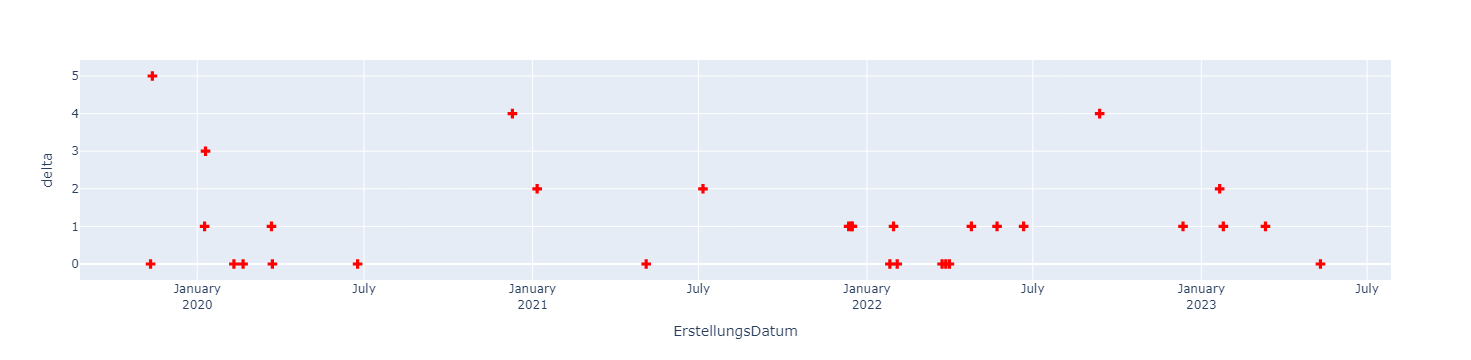

In [116]:
fig = px.scatter(filtered, x='ErstellungsDatum', y='delta', hover_data=HOVER_DATA_DELTA)
#fig = px.timeline(filtered, x_start='ErstellungsDatum', x_end='ErledigungsDatum', y='VorgangsID')
fig.update_traces(marker=MARKERS)
fig.update_xaxes(tickformat='%B\n%Y')
#fig.update_yaxes(type='category')
fig.update_yaxes(dtick=1)
fig.update_layout(hovermode='x unified')

In [129]:
scatt = go.Scatter(x=filtered['ErstellungsDatum'], y=filtered['delta'])

In [ ]:
scatt.update

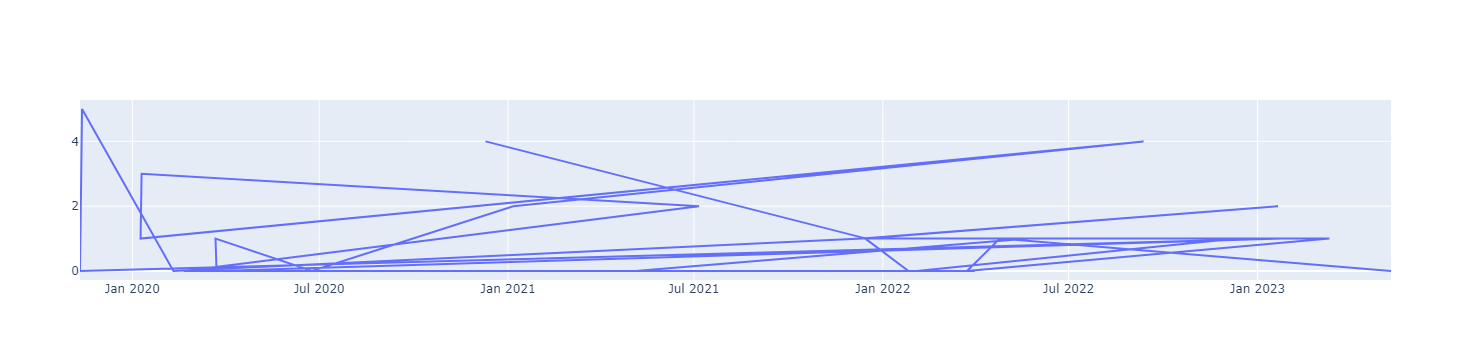

In [130]:
fig = go.Figure()
fig.add_trace(scatt)
fig.show()

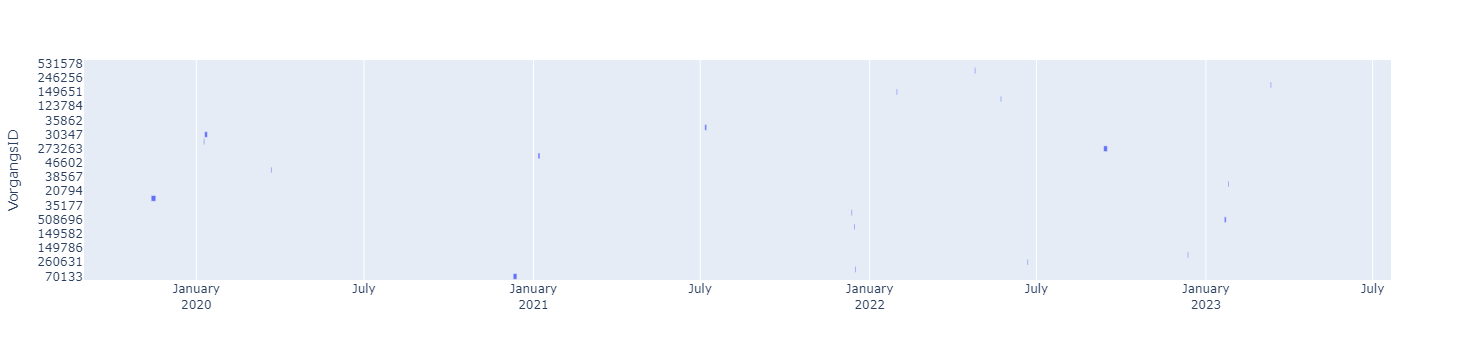

In [117]:
#fig = px.scatter(filtered, x='ErstellungsDatum', y='delta')
fig = px.timeline(filtered, x_start='ErstellungsDatum', x_end='ErledigungsDatum', y='VorgangsID')
fig.update_xaxes(tickformat='%B\n%Y')
fig.update_yaxes(type='category')
#fig.update_yaxes(tickformat=',d', dtick=1)

In [16]:
tk_graph_cands, _ = tokens.build_token_graph(
    data=filtered,
    model=SPCY_MODEL,
    target_feature='VorgangsBeschreibung',
    build_map=False,
    logging_graph=False,
)

  0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
tuple(tk_graph_cands.edges)

()

In [18]:
for edge in tk_graph_cands.edges:
    print(tk_graph_cands.edges[edge])

In [12]:
weights = [data['weight'] for data in tk_graph_cands.edges.values()]
weights

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
weights = [20 for _ in range(10)]

In [21]:
weights

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]

In [22]:
import numpy as np

In [23]:
np.log(weights)

array([2.99573227, 2.99573227, 2.99573227, 2.99573227, 2.99573227,
       2.99573227, 2.99573227, 2.99573227, 2.99573227, 2.99573227])

In [13]:
rescaled_dir, rescaled_undir = graphs.pipe_rescale_graph_edge_weights(tk_graph_cands)

TokenGraph(name: TokenGraph, number of nodes: 12, number of edges: 17)

In [15]:
for edge in rescaled_dir.edges:
    print(rescaled_dir.edges[edge])

print('------------------------------------')

for edge in rescaled_undir.edges:
    print(rescaled_undir.edges[edge])

{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
------------------------------------
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
{'weight': 0.0952}
